In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from Utils.Gas_Storage_Env import GasStorageEnv
import numpy as np
import os
import matplotlib.pyplot as plt
from stable_baselines3 import PPO, DDPG, TD3, A2C, SAC, DQN
from Train import run_test
from Utils.Plots import plot_sigma_robustness,plot_sigma_robustness_single

import pandas as pd

# **ASSESSING ROBUSTNESS FOR DIFFERENT SIGMAS**

In [2]:
# 1) Test sigma values
sigma_s = [0.035, 0.04, 0.045, 0.05, 0.055, 0.06,0.065,0.07]

# 2) Metrics
ep_metric_keys = [
    "reward", "bank account", "inventory", "market", "demand", "supply", 
    "excess demand", "demand shifter", "supply shifter", "delta price", "price","reward for the mean", "november inventory","demand unsat","wasted supply"
]

# 3) Episodes and steps
n_episodes     = 10
max_test_steps = 360

## *BASELINE MODEL (NO PENALTY TRESHOLD)*

In [9]:
 #load model 
model = SAC.load("/home/tizianobacaloni/GasRL/Models/sac_model_1500000_pen1000.0_pen_thresh0.0_rep4/sac_model_1500000_pen1000.0_pen_thresh0.0_rep4.zip")
import os
print("Working dir:", os.getcwd())


Working dir: /home/tizianobacaloni/GasRL/Plots


In [10]:
cumulative = ["reward", "market","bank account"]
# 1) Accumulators
sigma_vals = []
means_dict = {k: [] for k in ep_metric_keys}
cis_dict   = {k: [] for k in ep_metric_keys}

# 2) For each sigma, compute the mean of each metric  
for sigma in sigma_s:
    tmp_mean, tmp_ci, _, _ = run_test(model, n_episodes, max_test_steps, ep_metric_keys, sigma=sigma)
    sigma_vals.append(sigma)
    
    for key in ep_metric_keys:
        if key in  cumulative:
            means_dict[key].append(((tmp_mean[key])[0][-1]))  # Each key of the dict is a 2-element list: 1st is an array of length  max_test_step in which each value is the mean across  n_reps repetitions for that step
            cis_dict[key].append(((tmp_ci[key][0][-1])))      # Since these variables are cumulative,  only take the last element of the list
                                                              # Taking[0] alows to acess 1st element of the list, which is the array above
        else:  #####MEAN OF THE MEAN ACROSS REPETITION
            means_dict[key].append(np.nanmean(tmp_mean[key])) # Computing mean over the array of lenght max_test_step instead taking the last element
            cis_dict[key].append(np.nanmean(tmp_ci[key]))     

# 3) Sving folder
save_root = "Sigma_without_pen_thresh"
os.makedirs(save_root, exist_ok=True)

# 4) Database  to be saved for faster plotting
np.save(os.path.join(save_root, "means_dict.npy"), means_dict)
np.save(os.path.join(save_root, "cis_dict.npy"),   cis_dict)



/home/tizianobacaloni/tiziano_data/miniconda3/lib/python3.12/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/home/tizianobacaloni/tiziano_data/miniconda3/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Test completed with 10 repetitions


/home/tizianobacaloni/GasRL/Train.py:274: RuntimeWarning: Mean of empty slice
  mean = np.squeeze(np.nanmean(data, axis=0))   # Mean of the max_test_step-lenght-array passo‑per‑passo
/home/tizianobacaloni/tiziano_data/miniconda3/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Test completed with 10 repetitions
Test completed with 10 repetitions
Test completed with 10 repetitions
Test completed with 10 repetitions
Test completed with 10 repetitions
Test completed with 10 repetitions
Test completed with 10 repetitions


/home/tizianobacaloni/GasRL/Utils/Plots.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=FIGSIZE)


<Figure size 400x400 with 0 Axes>

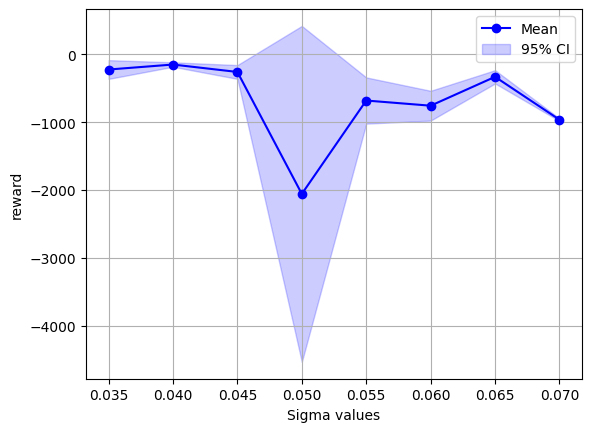

<Figure size 400x400 with 0 Axes>

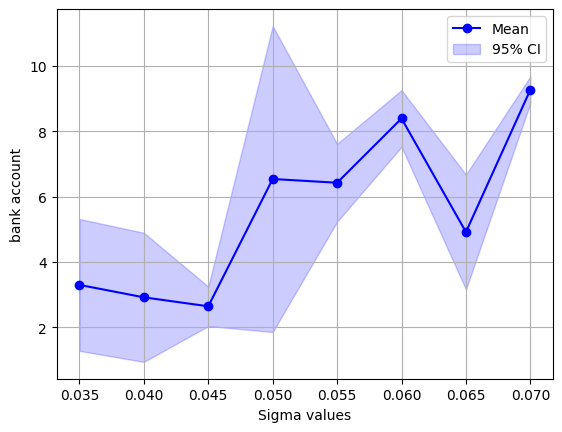

<Figure size 400x400 with 0 Axes>

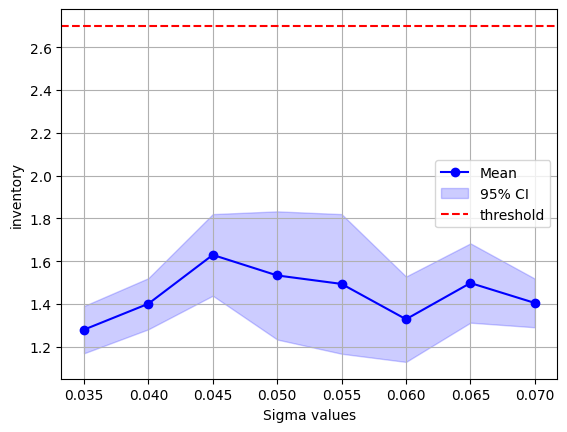

<Figure size 400x400 with 0 Axes>

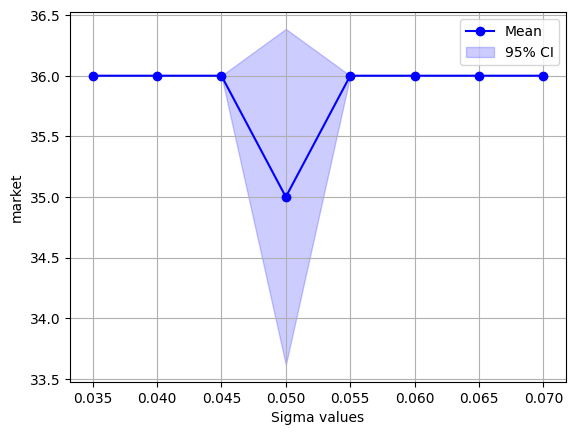

<Figure size 400x400 with 0 Axes>

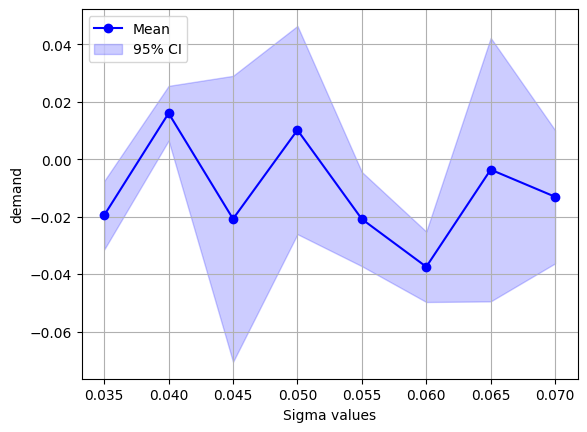

<Figure size 400x400 with 0 Axes>

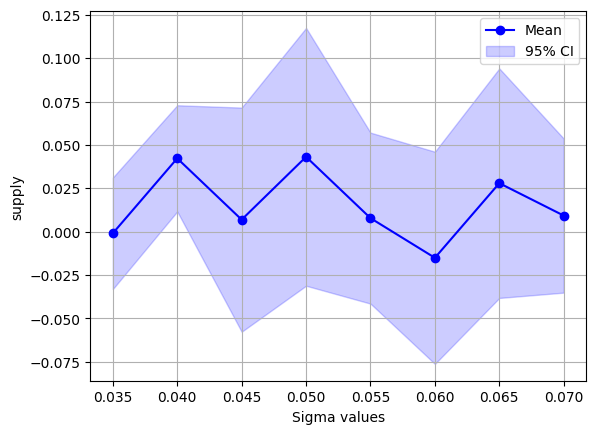

<Figure size 400x400 with 0 Axes>

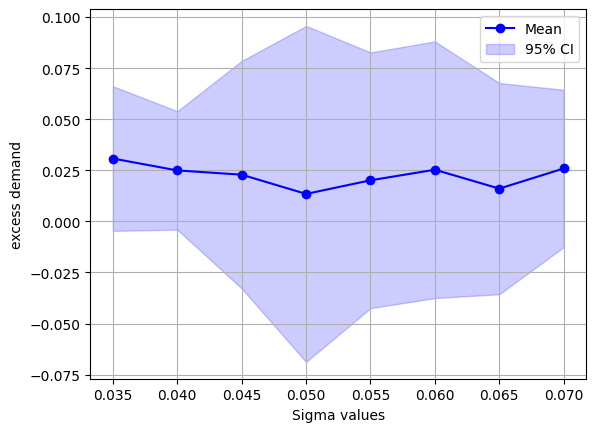

<Figure size 400x400 with 0 Axes>

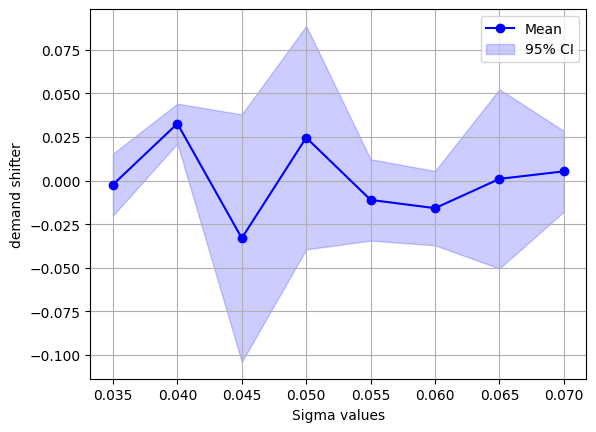

<Figure size 400x400 with 0 Axes>

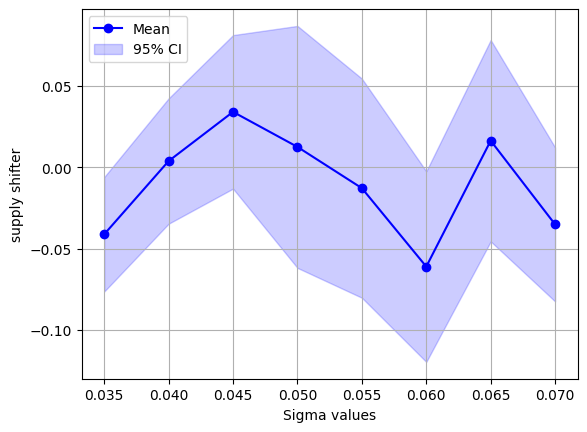

<Figure size 400x400 with 0 Axes>

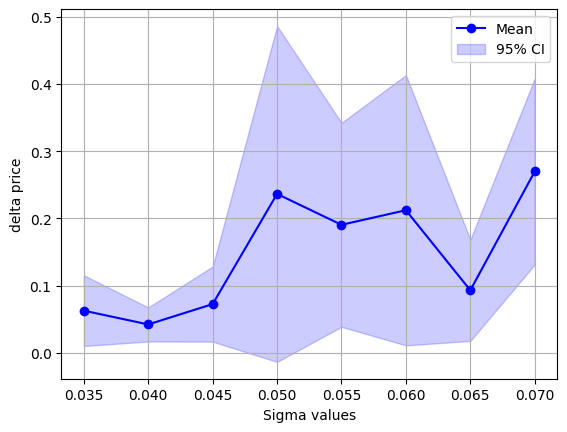

<Figure size 400x400 with 0 Axes>

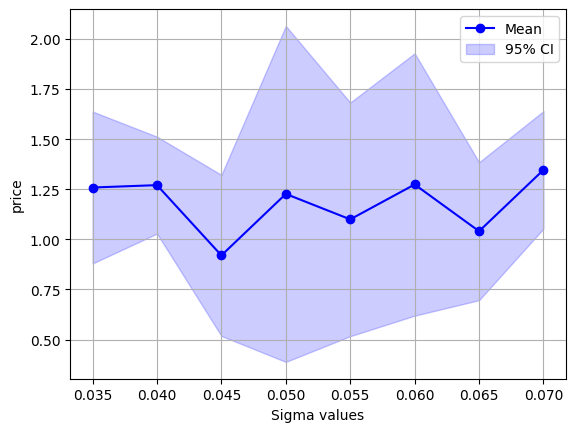

<Figure size 400x400 with 0 Axes>

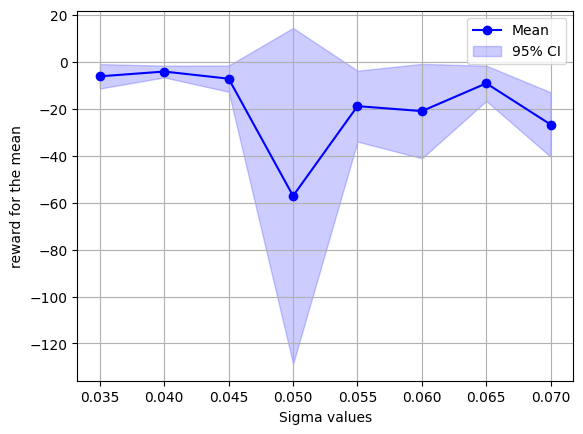

<Figure size 400x400 with 0 Axes>

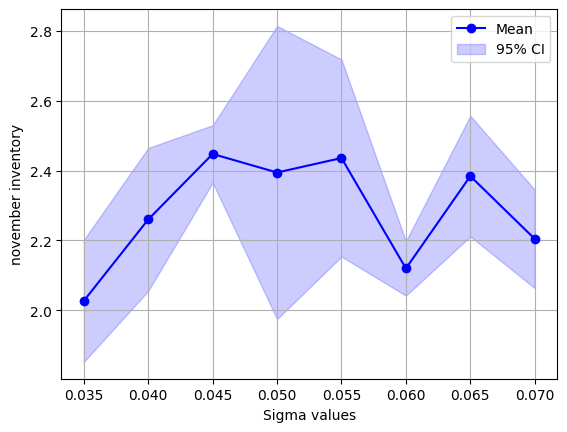

<Figure size 400x400 with 0 Axes>

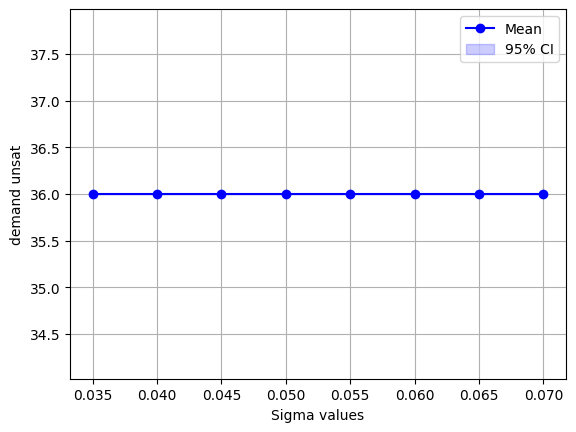

<Figure size 400x400 with 0 Axes>

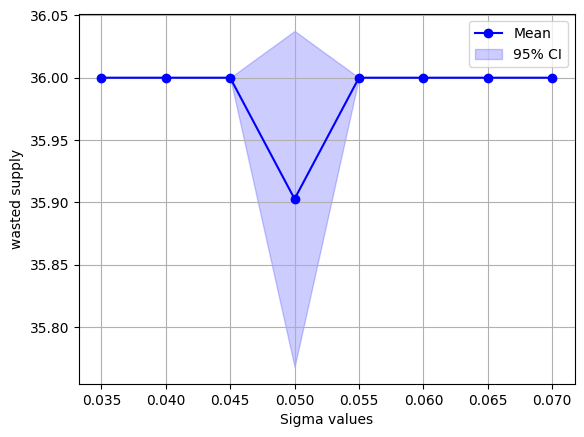

In [23]:
means_dict = np.load("Sigma_without_pen_thresh/means_dict.npy", allow_pickle=True)
cis_dict = np.load("Sigma_without_pen_thresh/cis_dict.npy", allow_pickle=True)
plot_sigma_robustness(sigma_vals,means_dict.item(),cis_dict.item(),ep_metric_keys)

## *MODEL WITH PENALTY TRESHOLD*

In [11]:
model = SAC.load("/home/tizianobacaloni/GasRL/Models/sac_model_1500000_pen1000.0_pen_thresh1000.0_rep1/sac_model_1500000_pen1000.0_pen_thresh1000.0_rep1.zip")

In [12]:
cumulative = ["reward", "market","bank account"]
# 1) Accumulators
sigma_vals = []
means_dict = {k: [] for k in ep_metric_keys}
cis_dict   = {k: [] for k in ep_metric_keys}

# 2) For each sigma,compute the mean of each metric
for sigma in sigma_s:
    tmp_mean, tmp_ci, _, _ = run_test(model, n_episodes, max_test_steps, ep_metric_keys, sigma=sigma)
    sigma_vals.append(sigma)
    
    for key in ep_metric_keys:
        if key in  cumulative:
            means_dict[key].append(((tmp_mean[key])[0][-1]))  # Each key of the dict is a 2-element list: 1st is an array of length  max_test_step in which each value is the mean across  n_reps repetitions for that step
            cis_dict[key].append(((tmp_ci[key][0][-1])))      # Since these variables are cumulative,  only take the last element of the list
                                                              # Taking[0] alows to acess 1st element of the list, which is the array above
        else:
            means_dict[key].append(np.nanmean(tmp_mean[key])) # Computing mean over the array of lenght max_test_step instead taking the last element
            cis_dict[key].append(np.nanmean(tmp_ci[key]))     

# 3) Saving folder
save_root = "Sigma_pen_thresh"
os.makedirs(save_root, exist_ok=True)

# 4) Database to be saved for faster plotting
np.save(os.path.join(save_root, "means_dict.npy"), means_dict)
np.save(os.path.join(save_root, "cis_dict.npy"),   cis_dict)
 

Test completed with 10 repetitions
Test completed with 10 repetitions
Test completed with 10 repetitions
Test completed with 10 repetitions
Test completed with 10 repetitions
Test completed with 10 repetitions
Test completed with 10 repetitions
Test completed with 10 repetitions


/home/tizianobacaloni/GasRL/Utils/Plots.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=FIGSIZE)


<Figure size 400x400 with 0 Axes>

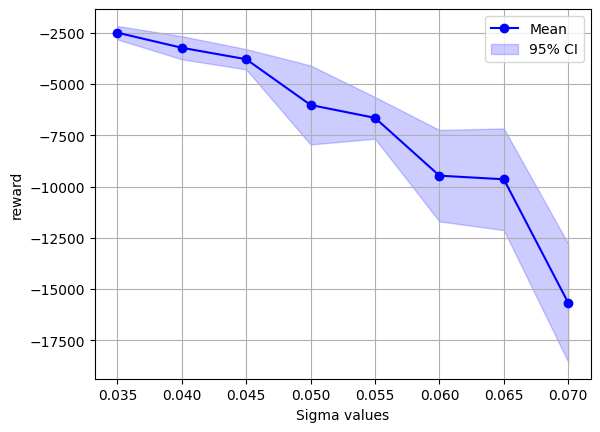

<Figure size 400x400 with 0 Axes>

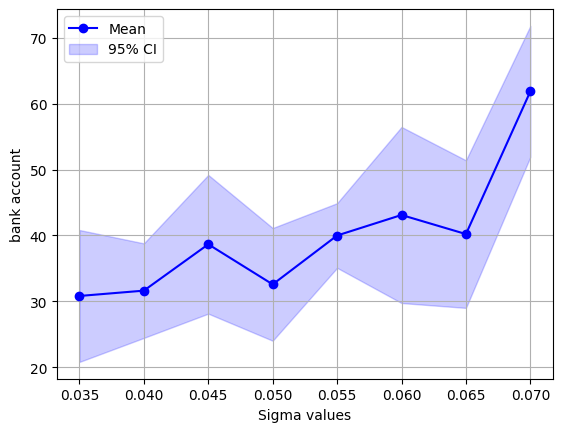

<Figure size 400x400 with 0 Axes>

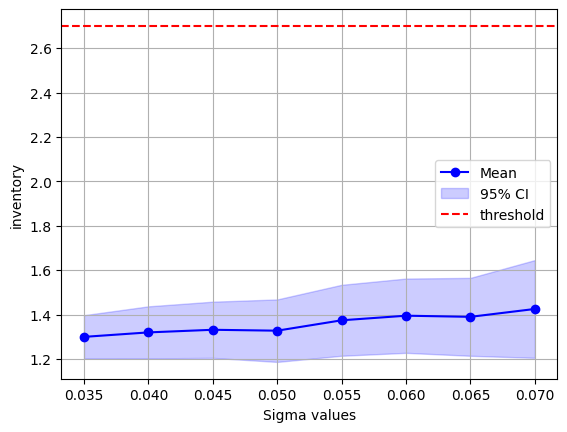

<Figure size 400x400 with 0 Axes>

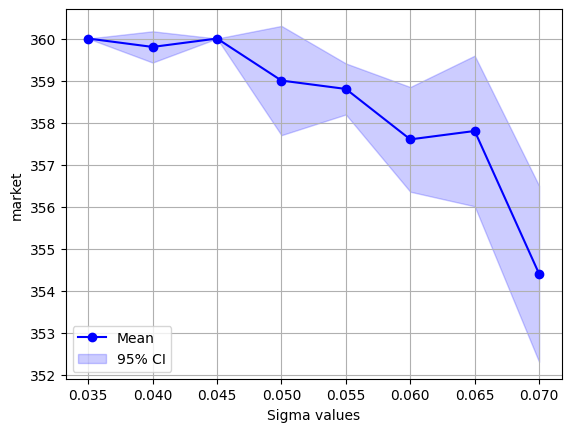

<Figure size 400x400 with 0 Axes>

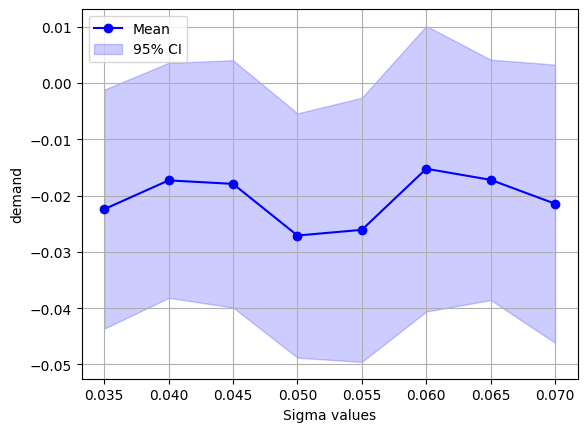

<Figure size 400x400 with 0 Axes>

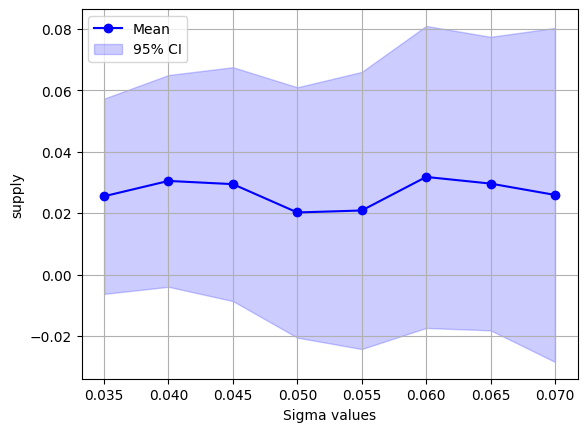

<Figure size 400x400 with 0 Axes>

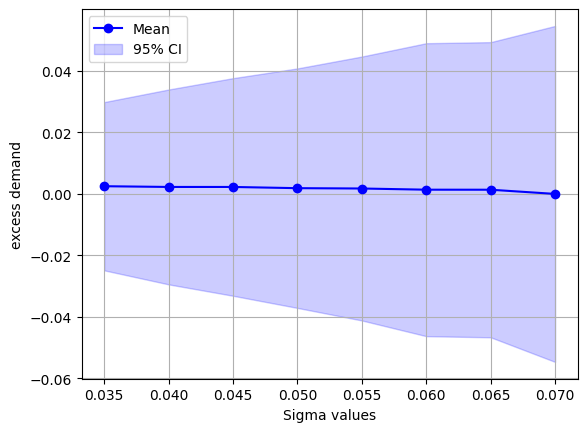

<Figure size 400x400 with 0 Axes>

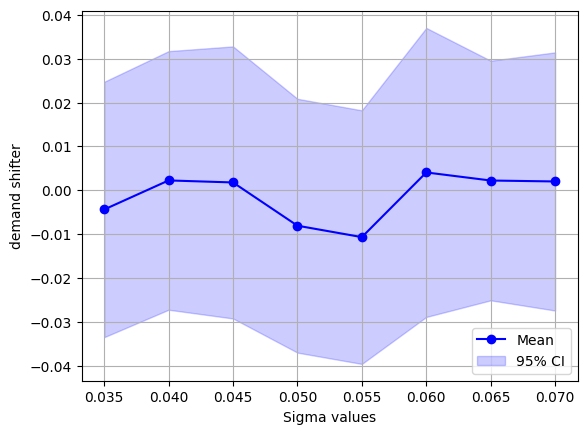

<Figure size 400x400 with 0 Axes>

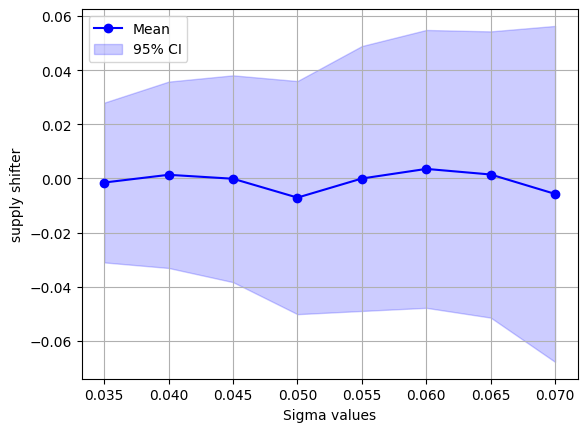

<Figure size 400x400 with 0 Axes>

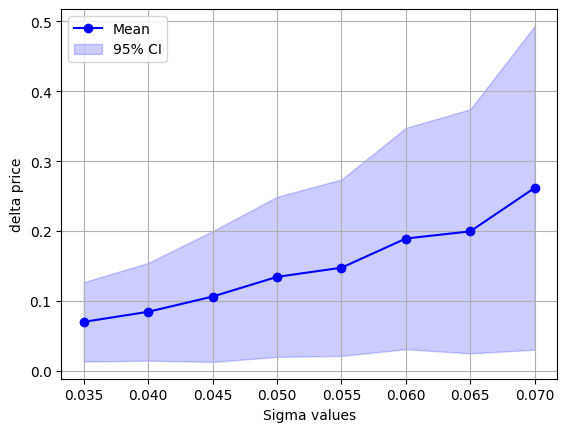

<Figure size 400x400 with 0 Axes>

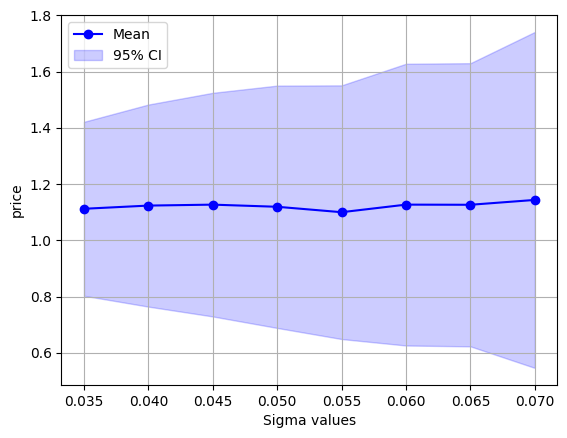

<Figure size 400x400 with 0 Axes>

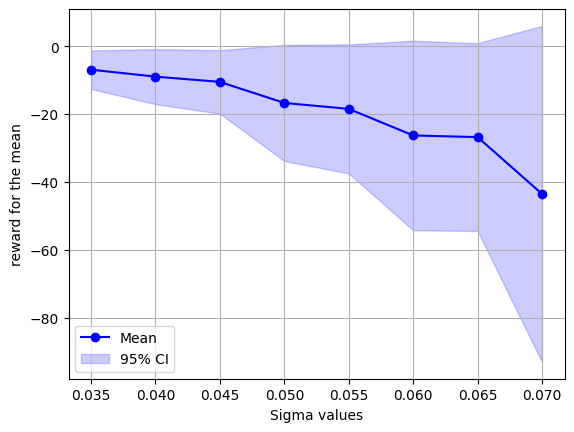

<Figure size 400x400 with 0 Axes>

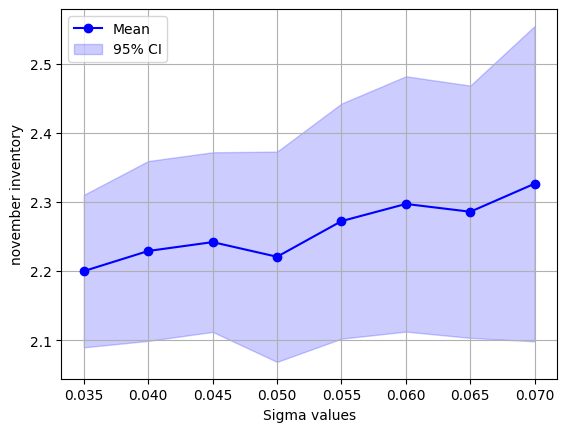

<Figure size 400x400 with 0 Axes>

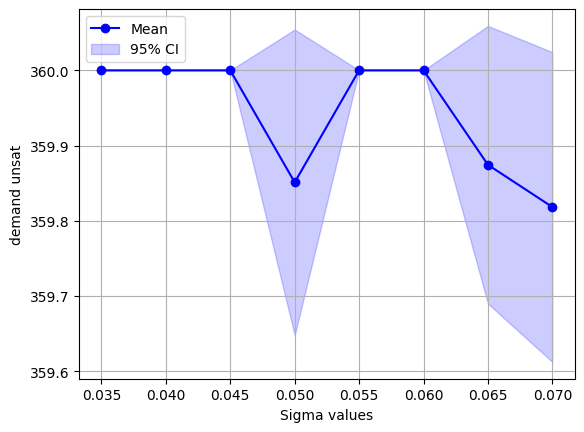

<Figure size 400x400 with 0 Axes>

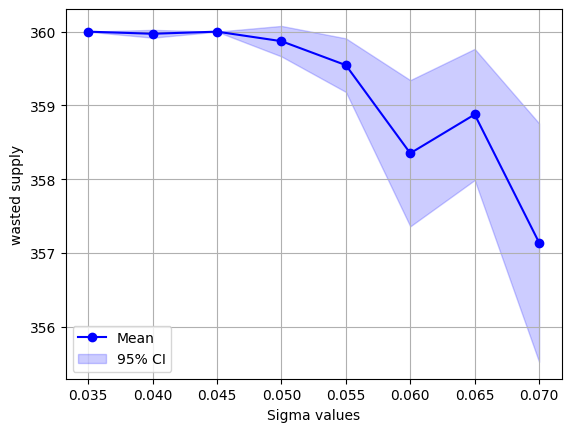

In [13]:
means_dict = np.load("Sigma_pen_thresh/means_dict.npy", allow_pickle=True)
cis_dict = np.load("Sigma_pen_thresh/cis_dict.npy", allow_pickle=True)
plot_sigma_robustness(sigma_vals,means_dict.item(),cis_dict.item(),ep_metric_keys)

In [14]:
FIGSIZE=(3,3)

## ***ROBUSTNESS COMPARISON***


##### *Price values are defined as: mean of price series, with lenght=max_test_step, in which each value t is the mean across n_reps*

In [15]:
# Loading data for both models
means_dict_1 = np.load("Sigma_without_pen_thresh/means_dict.npy", allow_pickle=True).item()
means_dict_2 = np.load("Sigma_pen_thresh/means_dict.npy", allow_pickle=True).item()
cis_dict_1 = np.load("Sigma_without_pen_thresh/cis_dict.npy", allow_pickle=True).item()
cis_dict_2 = np.load("Sigma_pen_thresh/cis_dict.npy", allow_pickle=True).item()


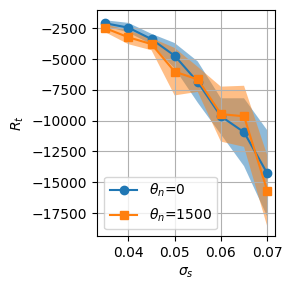

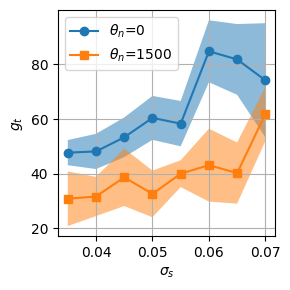

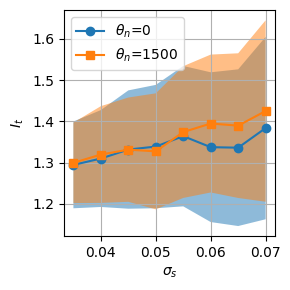

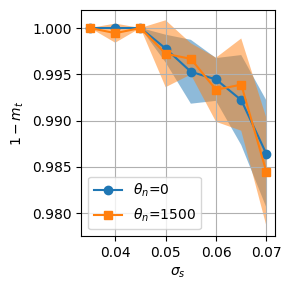

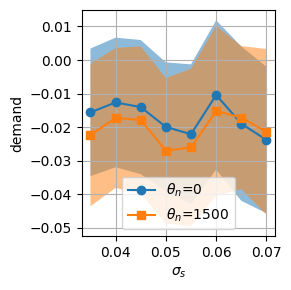

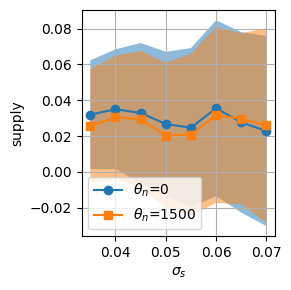

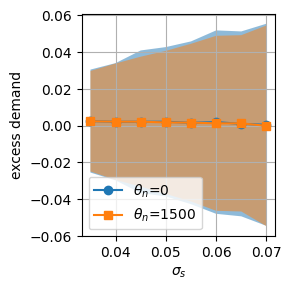

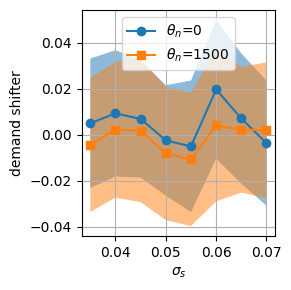

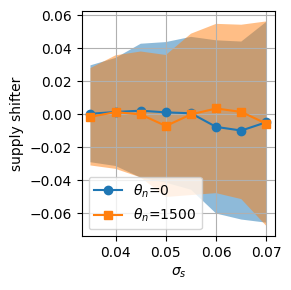

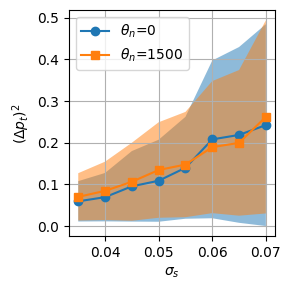

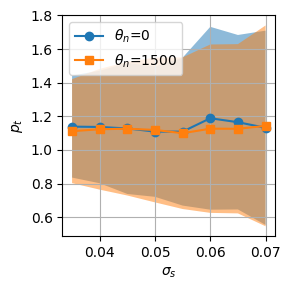

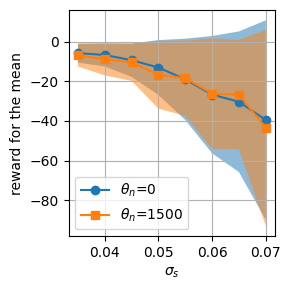

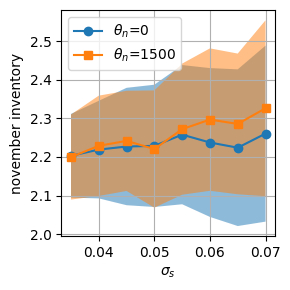

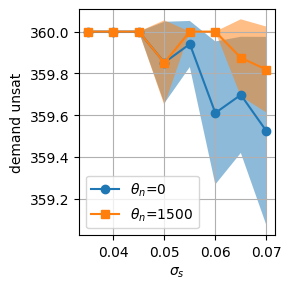

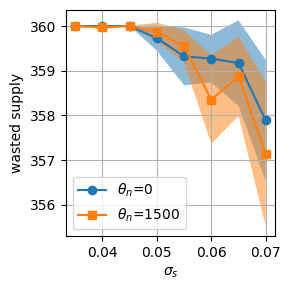

In [16]:

#Plotting the metrics for both models
for key in means_dict_1.keys():
    metric_data_1 = means_dict_1[key]
    metric_data_2 = means_dict_2[key]
    metric_1_ci = cis_dict_1[key]
    metric_2_ci = cis_dict_2[key]

    plt.figure(figsize=FIGSIZE)

    # Dividing both market success (1-m_t) and bank account (g_t) by 360 
    if key in ["bank_account","market"]:
        plt.plot(sigma_s, np.array(metric_data_1) / 360, marker='o', label=r"$\theta_n$=0") # No penalty threshold
        plt.fill_between(sigma_s, 
                        (np.array(metric_data_1) - np.array(metric_1_ci)) / 360, 
                        (np.array(metric_data_1) + np.array(metric_1_ci)) / 360, 
                        alpha=0.5)

        plt.plot(sigma_s, np.array(metric_data_2) / 360, marker='s', label=r"$\theta_n$=1500") # Penalty threshold = 1500
        plt.fill_between(sigma_s, 
                        (np.array(metric_data_2) - np.array(metric_2_ci)) / 360, 
                        (np.array(metric_data_2) + np.array(metric_2_ci)) / 360, 
                        alpha=0.5)
        
    else:
        plt.plot(sigma_s, np.array(metric_data_1) , marker='o', label=r"$\theta_n$=0")
        plt.fill_between(sigma_s, 
                 (np.array(metric_data_1) - np.array(metric_1_ci)), 
                 (np.array(metric_data_1) + np.array(metric_1_ci)), 
                 alpha=0.5)

        plt.plot(sigma_s, np.array(metric_data_2) , marker='s', label=r"$\theta_n$=1500" )
        plt.fill_between(sigma_s, 
                        (np.array(metric_data_2) - np.array(metric_2_ci)) , 
                        (np.array(metric_data_2) + np.array(metric_2_ci)) , 
                        alpha=0.5)
            

    plt.xlabel(r"$\sigma_s$")
    if key == "bank account":
        plt.ylabel(r"$g_t$")
    elif key == "market":
        plt.ylabel(r"$1-m_t$")
    elif key == "delta price":
       plt.ylabel(r'$(\Delta p_t)^2$')
    elif key == "price":
        plt.ylabel(r'$p_t$')
    elif key == "inventory":
        plt.ylabel(r'$I_t$')
    elif key == "reward":
        plt.ylabel(r"$R_t$")
    else:
        plt.ylabel(key)
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

